<a href="https://colab.research.google.com/github/Luuhlf/quant-estudos-volatilidade/blob/volatilidade/Comportamento%20do%20pre%C3%A7o%20BTC-USD%20em%2010%20minutos%20com%20extra%C3%A7%C3%A3o%20em%20tempo%20real%20a%20cada%205s%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install request_html
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement request_html (from versions: none)
ERROR: No matching distribution found for request_html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.6 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 83 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 37.5 MB/s 
     |████████████████████████████████| 106 kB 54.9 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=db0ac48aa2701f72a1204abdce61f1725561036bfa068f2f95bea44e96e56c0c
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=631c443e59ee5663cf4

In [5]:
from yahoo_fin import stock_info as si

In [10]:
si.get_live_price('aapl')

132.3699951171875

In [12]:
#arredondando preço para duas casas decimais
round(si.get_live_price('BBDC4.SA'), 2)

14.2

In [13]:
round(si.get_live_price('BTC-USD'), 2)

16826.99

##Criando loop  para extração de cotações ao vivo

In [14]:
round(si.get_live_price('BTC-USD'), 2)

1213.14

In [16]:
import time 
import datetime
import pandas as pd

In [17]:
time.time()

1671538637.8760269

In [33]:
n = 10

tempo = time.time() +60*n

In [34]:
a = 0 
df = pd.DataFrame(columns= ['Hora', 'Preço'])

while time.time() < tempo:
  preco = round(si.get_live_price('ETH-USD'), 2)
  tempo_real = datetime.datetime.fromtimestamp(time.time())
  tempo_real = tempo_real.strftime("%d-%b-%Y %H:%M:%S")

  d = {'Hora': tempo_real, 'Preço': preco}

  print(d)

  linha = pd.DataFrame(data = d, index = [a])

  a += 1

  df = pd.concat([df, linha], ignore_index=True)

  time.sleep(5)

{'Hora': '20-Dec-2022 12:42:25', 'Preço': 1213.05}
{'Hora': '20-Dec-2022 12:42:30', 'Preço': 1213.05}
{'Hora': '20-Dec-2022 12:42:36', 'Preço': 1213.05}
{'Hora': '20-Dec-2022 12:42:41', 'Preço': 1213.05}
{'Hora': '20-Dec-2022 12:42:46', 'Preço': 1213.05}
{'Hora': '20-Dec-2022 12:42:52', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:42:57', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:02', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:08', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:13', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:19', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:24', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:29', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:35', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:40', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:46', 'Preço': 1213.1}
{'Hora': '20-Dec-2022 12:43:51', 'Preço': 1213.53}
{'Hora': '20-Dec-2022 12:43:56', 'Preço': 1213.53}
{'Hora': '20-Dec-2022 12:44:02', 'Preço': 1213.53}
{'Hora': '20-Dec-2022 12:44:07', 'Preço': 

In [35]:
df.head()

,Hora,Preço
0,20-Dec-2022 12:42:25,1213.05
1,20-Dec-2022 12:42:30,1213.05
2,20-Dec-2022 12:42:36,1213.05
3,20-Dec-2022 12:42:41,1213.05
4,20-Dec-2022 12:42:46,1213.05


In [36]:
df.index = df['Hora']

In [37]:
df

,Hora,Preço
Hora,,
20-Dec-2022 12:42:25,20-Dec-2022 12:42:25,1213.05
20-Dec-2022 12:42:30,20-Dec-2022 12:42:30,1213.05
20-Dec-2022 12:42:36,20-Dec-2022 12:42:36,1213.05
20-Dec-2022 12:42:41,20-Dec-2022 12:42:41,1213.05
20-Dec-2022 12:42:46,20-Dec-2022 12:42:46,1213.05
...,...,...
20-Dec-2022 12:51:56,20-Dec-2022 12:51:56,1214.20
20-Dec-2022 12:52:02,20-Dec-2022 12:52:02,1214.20
20-Dec-2022 12:52:07,20-Dec-2022 12:52:07,1214.20


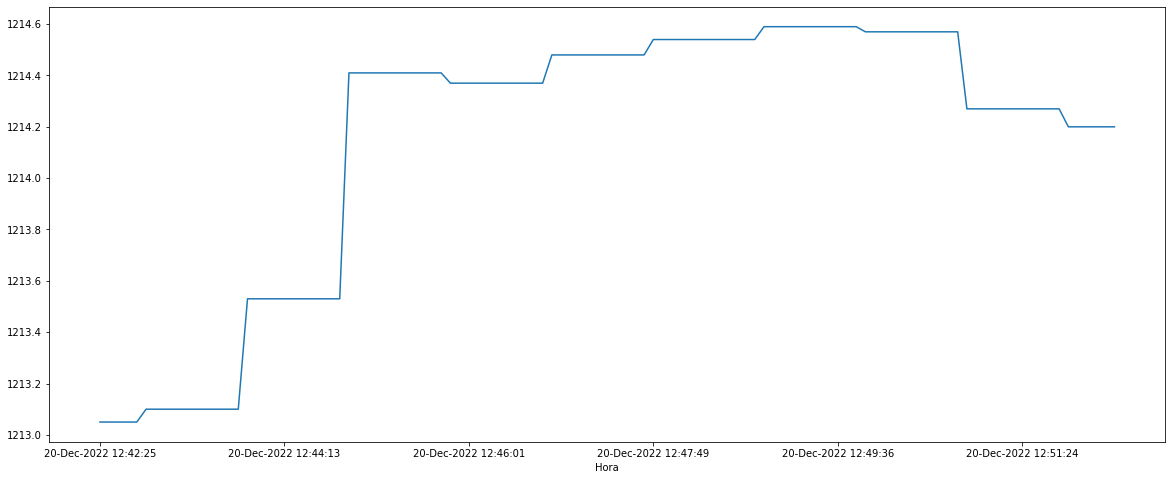

In [38]:
df['Preço'].plot(figsize = (20,8));